In [1]:
import pandas as pd
import seaborn as sn
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import math
from decimal import *
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', skiprows=1)

In [53]:
data.head()
#Attribute Information:
#1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
#2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
#3. RH : Relative Humidity in %: 21 to 90
#4. Ws :Wind speed in km/h: 6 to 29
#5. Rain: total day in mm: 0 to 16.8 FWI Components
#6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
#7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
#8. Drought Code (DC) index from the FWI system: 7 to 220.4
#9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
#10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
#11. Fire Weather Index (FWI) Index: 0 to 31.1
#12. Classes: two classes, namely Fire and not Fire

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [54]:
# filtering out the rows with `day` value in corresponding column
data = data[data.day.str.contains('day') == False]

In [55]:
data.shape

(245, 14)

In [56]:
# Adding additional column Region name to the dataset 
data['Region']=1

In [78]:
#Striping additional space in the column names
data.columns=data.columns.str.strip()

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          243 non-null    object
 13  Classes      244 non-null    object
 14  Region       245 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.6+ KB


In [59]:
#Converting object columns to numeric and filling with NaN for non numeric data
num_cols=['day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']
data[num_cols]=data[num_cols].apply(pd.to_numeric, errors='coerce')

In [60]:
# Converted to numeric
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       245 non-null    int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 30.6+ KB


In [61]:
#Finding the location of value which is not numeric 
loc=data.loc[data['day'].isna()].index.values[0]
loc

123

In [62]:
data.loc[loc:, :]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
125,1.0,6.0,2012.0,32.0,71.0,12.0,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
126,2.0,6.0,2012.0,30.0,73.0,13.0,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
127,3.0,6.0,2012.0,29.0,80.0,14.0,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
128,4.0,6.0,2012.0,30.0,64.0,14.0,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
243,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
244,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
245,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [63]:
#Changing the region value from 1 to 0
data['Region'][loc:]=0

In [64]:
data.shape

(245, 15)

In [65]:
data.dropna(subset=['day'], how='all', inplace=True)

In [66]:
data.shape

(244, 15)

In [67]:
#Checking missing values
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Classes        0
Region         0
dtype: int64

In [68]:
# identifying missing value row 
data[~data["FWI"].notna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
168,14.0,7.0,2012.0,37.0,37.0,18.0,0.2,88.9,12.9,NaN,12.5,10.4,NaN,fire,0


In [69]:
#filling the missing data with mean for column FWI
FWI_mean=data["FWI"].mean()
replace_with_mean = round(FWI_mean, 1)
data["FWI"].fillna(replace_with_mean,inplace=True)

In [70]:
#filling the missing data with mean for column DC
DC_mean=data["DC"].mean()
replace_with_mean = round(DC_mean, 1)
data["DC"].fillna(replace_with_mean,inplace=True)

In [80]:
# triming spaces in values 
data.Classes=data.Classes.str.strip()
data['DC']=data['DC'].astype('string')
data.DC=data.DC.str.strip()
data['DC']=data['DC'].astype('float64')

In [81]:
#Checking missing values
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [82]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.430738,47.567428,6.9,13.275,33.25,68.150,220.4


In [83]:
# droping columns day, month, year no significance impact on temperature
data_copy_nodate=data.copy()
data_copy_nodate.drop(['day', 'month','year'], axis=1,inplace=True)

In [84]:
data_copy_nodate.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.430738,47.567428,6.9,13.275,33.25,68.150,220.4
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.664754,14.204824,1.1,6.000,12.25,22.525,68.0
FWI,244.0,7.035246,7.425242,0.0,0.700,4.45,11.375,31.1


In [85]:
data_copy_nodate.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.374905,0.607551,0.455504,0.564573,-0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.225617,-0.690637,-0.348587,-0.577544,0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.079003,0.015248,0.029756,0.032298,0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.297974,-0.347105,-0.299171,-0.324363,0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.506776,0.739730,0.589652,0.690274,-0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875888,0.674499,0.982073,0.875830,-0.191094
DC,0.374905,-0.225617,0.079003,-0.297974,0.506776,0.875888,1.000000,0.505027,0.941611,0.739521,0.078574
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.505027,1.000000,0.635891,0.916307,-0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941611,0.635891,1.000000,0.857637,-0.087370
FWI,0.564573,-0.577544,0.032298,-0.324363,0.690274,0.875830,0.739521,0.916307,0.857637,1.000000,-0.196677


In [86]:
#Observations
#Temperature is positively correlated with FFMC, DMC,DC, ISI,BUI,FWI. FFMC, ISI, FWI,DMC are 
# Temperature and Humidity are inversly propotinal. 
# FFMC is strongly associated with Temperature, DMC, DC, ISI, BUI and FWI

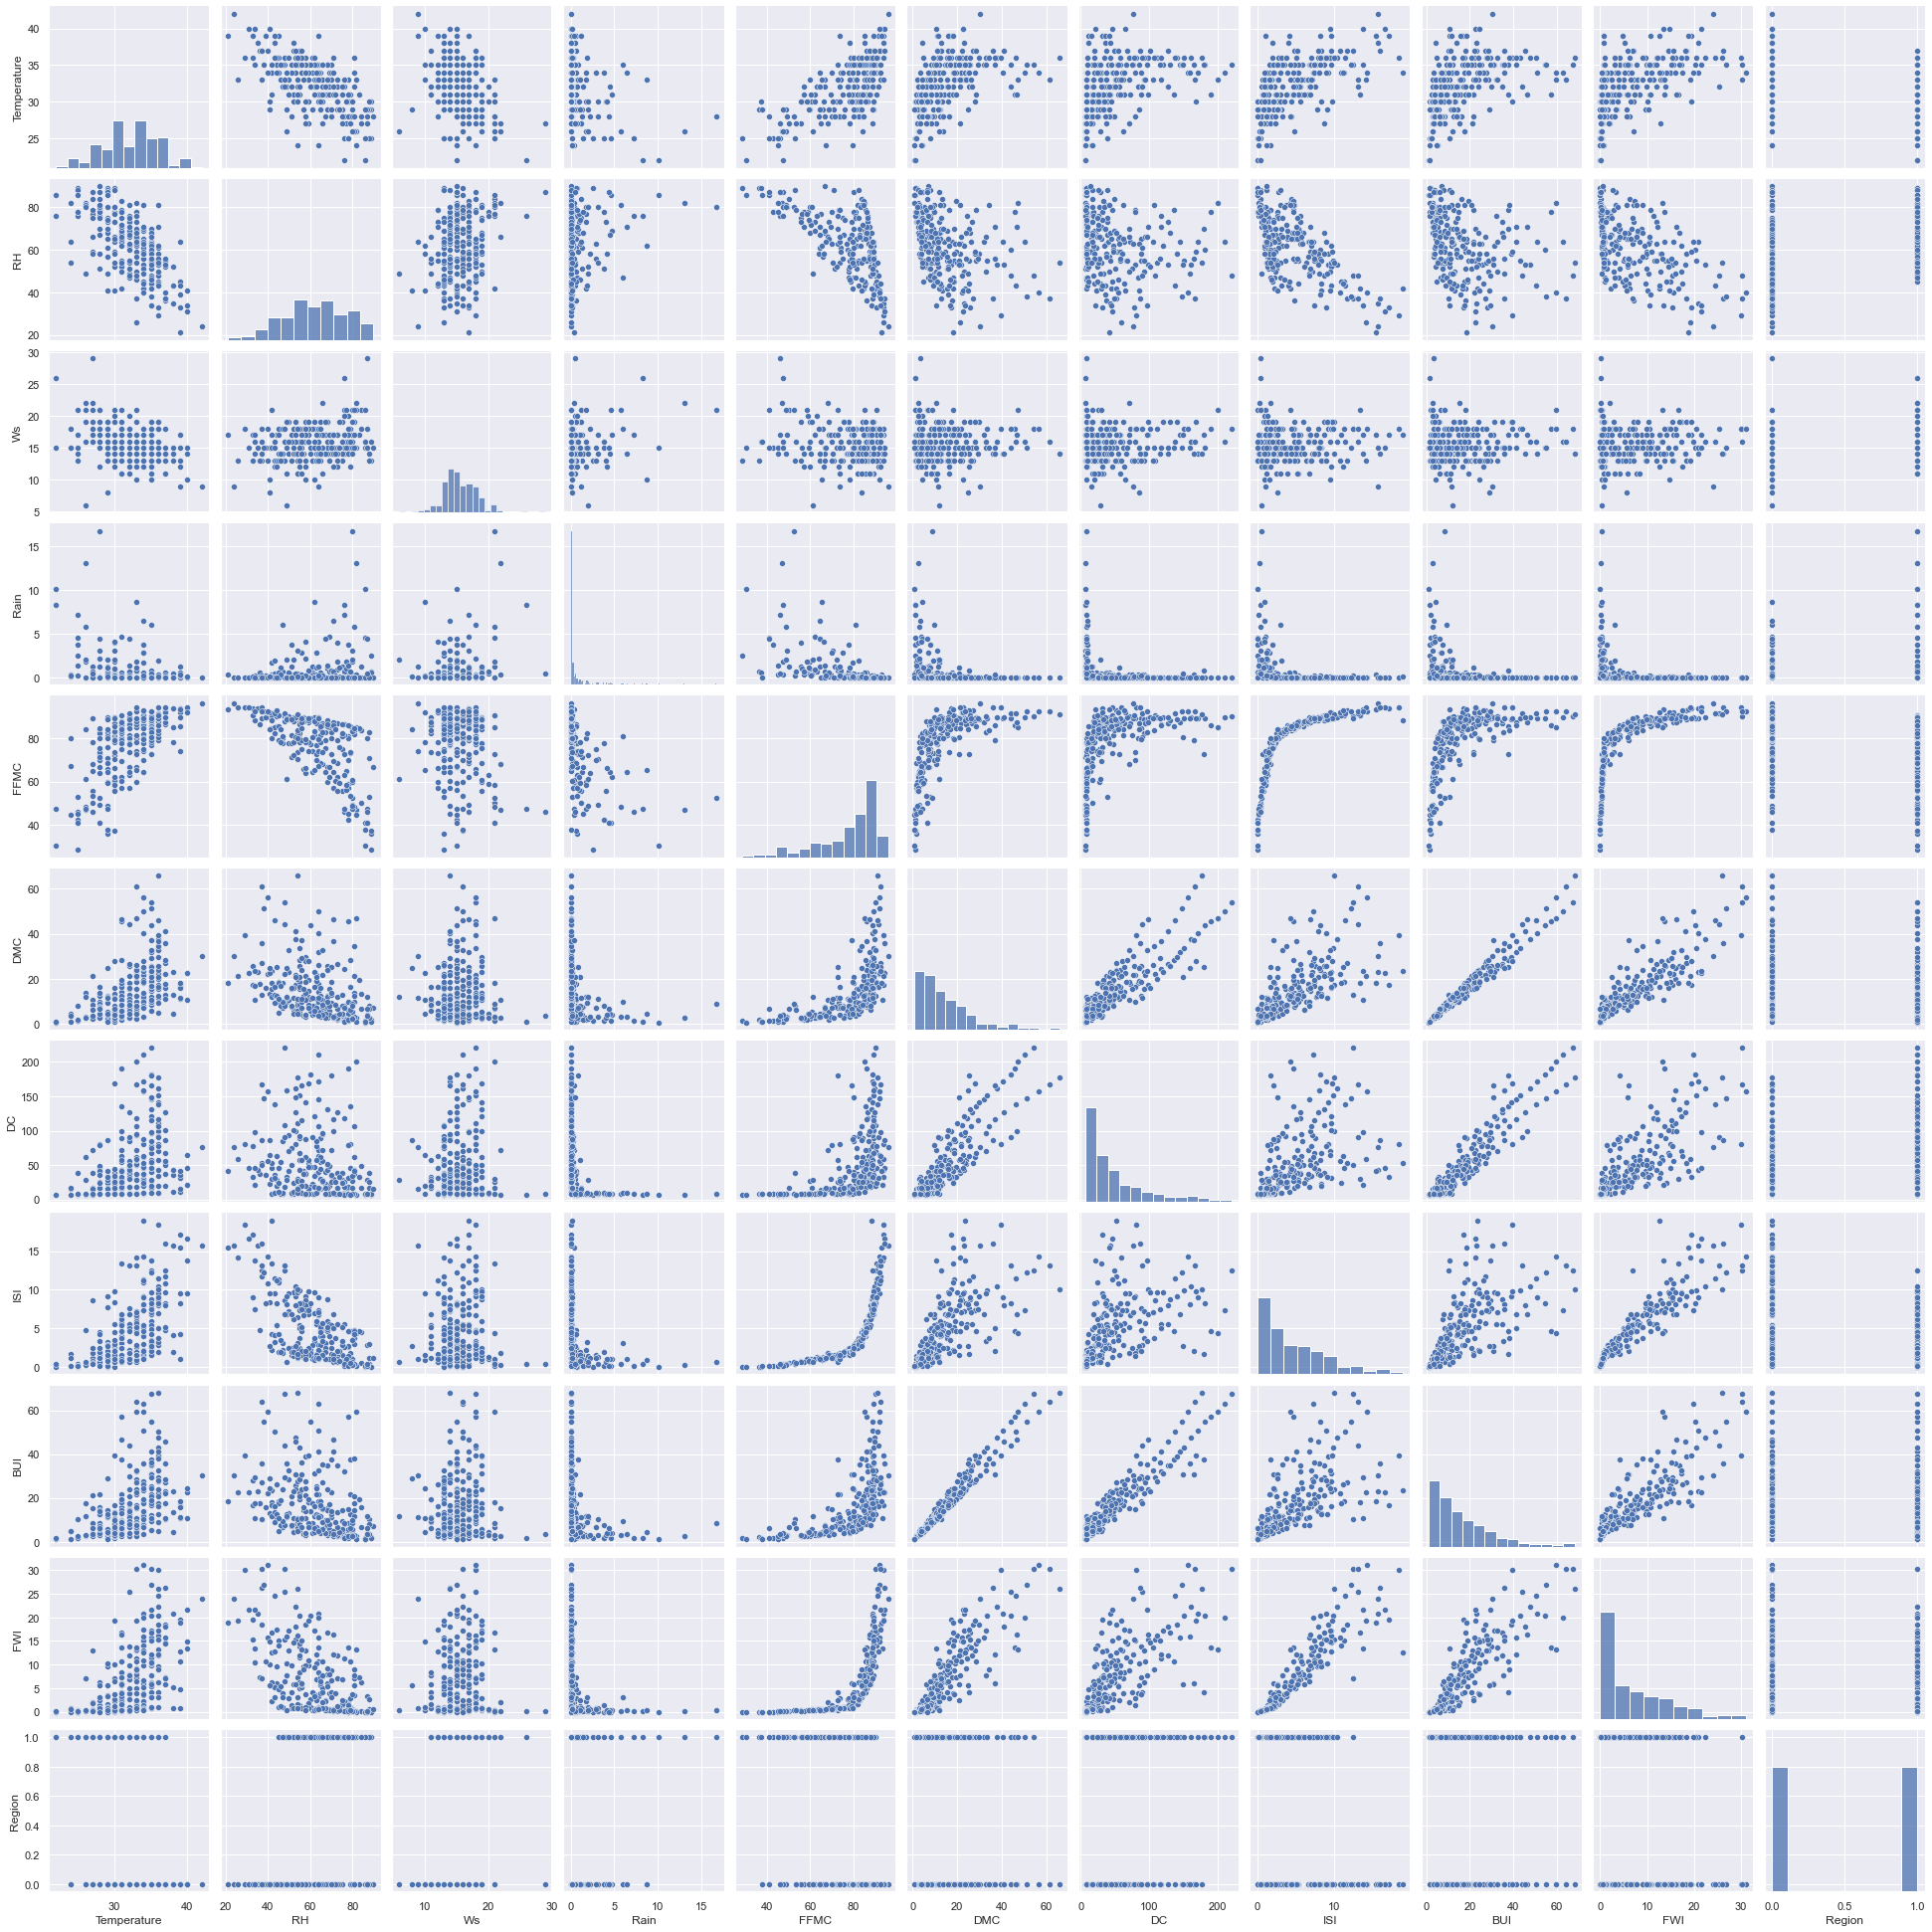

In [87]:
sn.set(rc={'figure.figsize':(10,8)})
sn.pairplot(data=data_copy_nodate)

<AxesSubplot:>

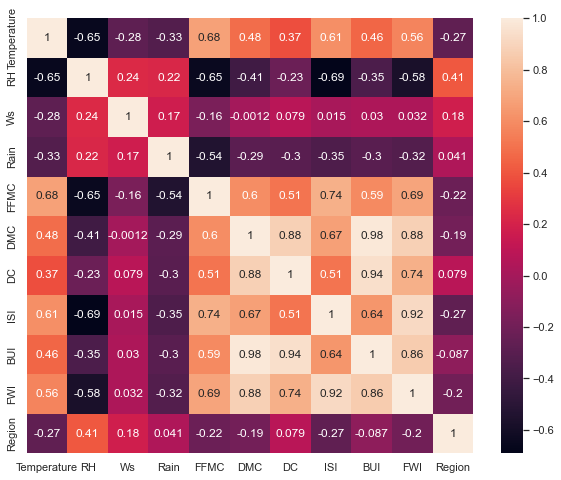

In [88]:
sn.heatmap(data_copy_nodate.corr(),annot=True)

In [90]:
data_copy_nodate.groupby([data_copy_nodate['Classes']=='fire']).count()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Classes,,,,,,,,,,,,
False,106,106,106,106,106,106,106,106,106,106,106,106
True,138,138,138,138,138,138,138,138,138,138,138,138


In [91]:
#Encoding Fire 1 Not Fore 0
data_copy_nodate['Classes'] = np.where(data_copy_nodate['Classes']=='fire',1,0)

In [92]:
data_copy_nodate.groupby([data_copy_nodate['Classes']==1]).count()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Classes,,,,,,,,,,,,
False,106,106,106,106,106,106,106,106,106,106,106,106
True,138,138,138,138,138,138,138,138,138,138,138,138


In [93]:
data_copy_nodate.sample(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
30,29.0,68.0,19.0,1.0,59.9,2.5,8.6,1.1,2.9,0.4,0,1
187,40.0,34.0,14.0,0.0,93.3,10.8,21.4,13.8,10.6,13.5,1,0
76,36.0,61.0,18.0,0.3,80.2,11.7,90.4,2.8,17.6,4.2,1,1
160,35.0,42.0,15.0,0.3,84.7,15.5,45.1,4.3,16.7,6.3,1,0
182,33.0,57.0,16.0,0.0,87.5,15.7,37.6,6.7,15.7,9.0,1,0


<AxesSubplot:xlabel='Temperature', ylabel='Count'>

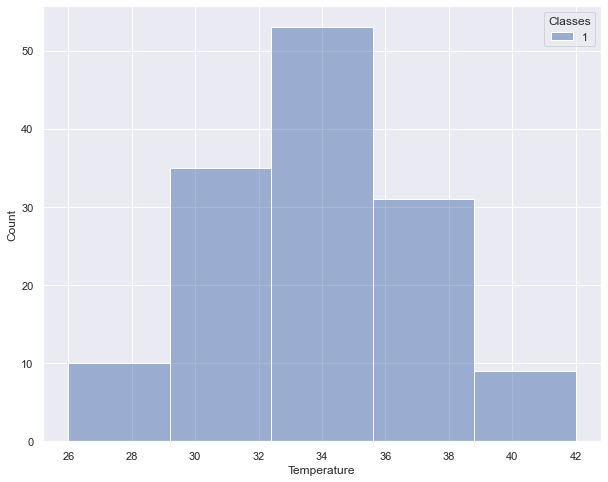

In [128]:
#When its fire what is the temperature
sn.histplot(data=data_copy_nodate[data_copy_nodate['Classes']==1], x='Temperature', y=None, hue='Classes', bins=5)

In [111]:
#Day temperatures are little higher when its Fire than not frie day

<AxesSubplot:xlabel='Temperature', ylabel='RH'>

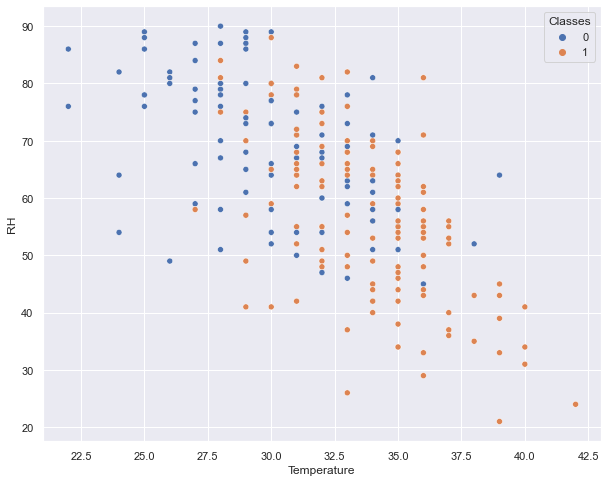

In [118]:
#When its fire what is the temperature
sn.scatterplot(data=data_copy_nodate, x='Temperature', y='RH', hue='Classes')

<AxesSubplot:xlabel='Temperature', ylabel='Ws'>

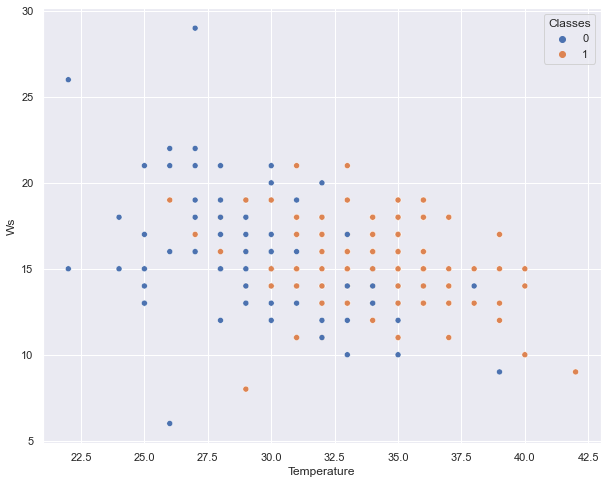

In [119]:
sn.scatterplot(data=data_copy_nodate, x='Temperature', y='Ws', hue='Classes')

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

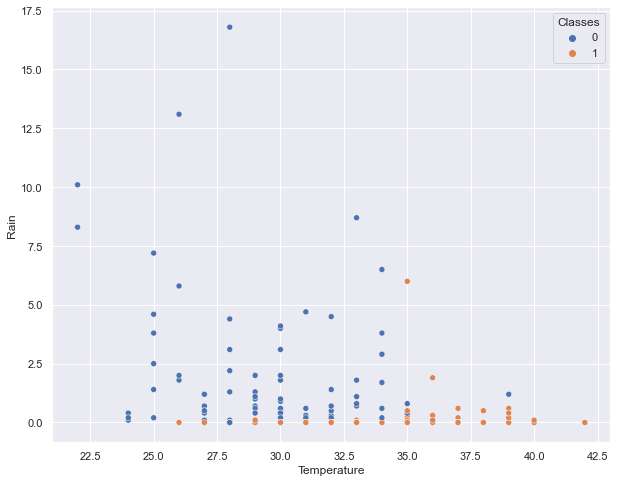

In [120]:
sn.scatterplot(data=data_copy_nodate, x='Temperature', y='Rain', hue='Classes')

<AxesSubplot:xlabel='Temperature'>

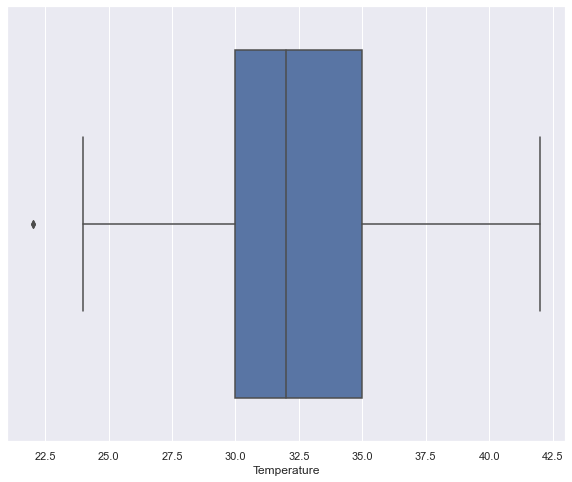

In [122]:
sn.boxplot(data_copy_nodate['Temperature'])

In [126]:
data_copy_nodate[data_copy_nodate['Temperature'] < 22.5]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
93,22.0,86.0,15.0,10.1,30.5,0.7,7.0,0.0,1.1,0.0,0,1
105,22.0,76.0,26.0,8.3,47.4,1.1,7.0,0.4,1.6,0.1,0,1


In [131]:
# Replacing outliers
data_copy_nodate.loc[data_copy_nodate["Temperature"] == 22.0, "Temperature"] = 22.5 #data_copy_nodate['Temperature'] =

In [134]:
data_copy_nodate[data_copy_nodate['Temperature'] <= 22.5]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
93,22.5,86.0,15.0,10.1,30.5,0.7,7.0,0.0,1.1,0.0,0,1
105,22.5,76.0,26.0,8.3,47.4,1.1,7.0,0.4,1.6,0.1,0,1


In [136]:
data_copy_nodate.shape

(244, 12)

In [140]:
##Independent And Dependent Features
X=data_copy_nodate.iloc[:,1:]
y=data_copy_nodate.iloc[:,0]

In [143]:
X.shape

(244, 11)

In [145]:
y.shape

(244,)

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.33, random_state=10)

In [148]:
#standardize or Feature scaling. FE bring feature on the same scale.

In [149]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [150]:
X_train=scaler.fit_transform(X_train)

In [151]:
X_test=scaler.transform(X_test) 

In [152]:
#Model Training

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
regression=LinearRegression()

In [155]:
regression.fit(X_train,y_train)

LinearRegression()

In [156]:
## print the coefficients and the intercept
print(regression.coef_)

[-1.21426711 -0.53770762 -0.23258919  0.91750444  0.08029247  1.01328719
  0.1766147  -0.6950335  -0.0039442   0.15657302 -0.26572432]


In [157]:
print(regression.intercept_)

32.18098159509202


In [158]:
## Prediction for test data
reg_pred=regression.predict(X_test)

In [159]:
reg_pred

array([31.74821777, 33.31530462, 33.11509061, 31.43308408, 32.87301227,
       34.75298037, 33.81198132, 34.56761447, 31.94417017, 32.87214687,
       33.76099849, 27.63939341, 35.4410006 , 29.63755237, 32.05260551,
       32.13853627, 34.30149267, 28.08691247, 35.99384996, 34.28346243,
       32.7064052 , 34.64494352, 33.50897696, 32.99335934, 35.84896024,
       29.04056121, 32.55622719, 32.63903484, 27.60919337, 32.25853109,
       26.01245402, 27.40841652, 33.83306002, 31.9633428 , 32.89011822,
       30.83789141, 28.94155363, 32.83671173, 27.75601133, 35.3780869 ,
       32.71045436, 34.09054445, 33.91115148, 31.65691538, 36.51600797,
       33.93802945, 24.44444773, 35.06945801, 33.87541262, 29.50039154,
       31.22171787, 32.38323501, 35.657159  , 32.09238069, 30.26287775,
       30.18706656, 32.87964599, 36.00621847, 31.31259073, 33.72871507,
       32.38255531, 32.76691378, 30.85771599, 24.50785325, 31.34859417,
       36.22954708, 29.67829612, 29.9428322 , 34.97403715, 33.76

In [160]:
### Assumptions of Linear Regrssion

Text(0, 0.5, 'Test Predicted Data')

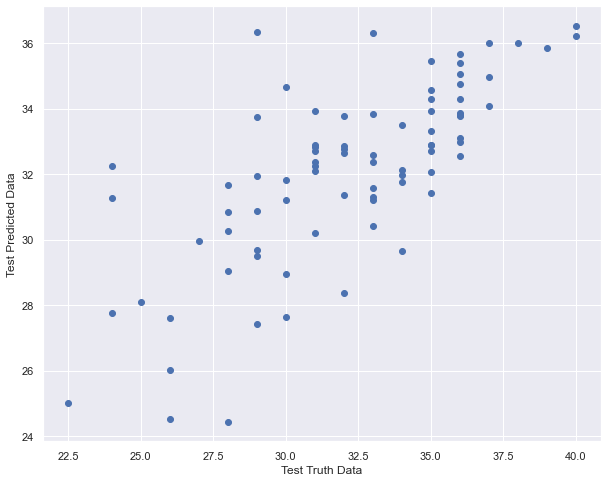

In [174]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [162]:
## residuals
residuals=y_test-reg_pred

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

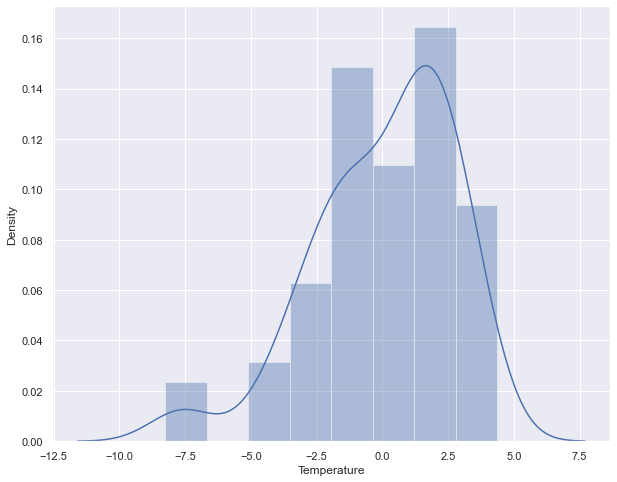

In [164]:
sn.distplot(residuals, kde=True)

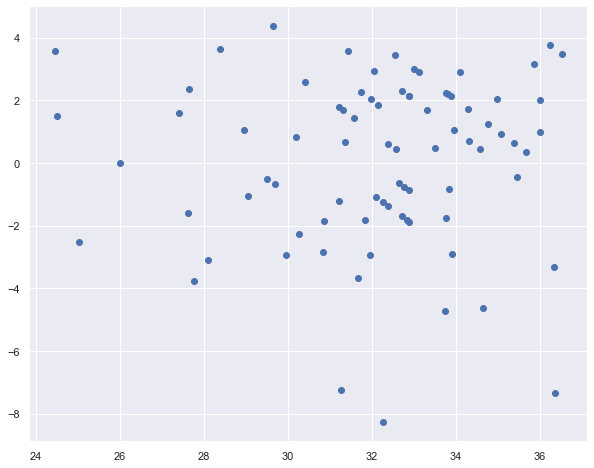

In [165]:
## Scatter plot with predictions and residuals
# uniform distribution
#homoscedacity
plt.scatter(reg_pred,residuals)

In [166]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.091077533759565
2.1779826177713844
2.6629077216005


In [167]:
## R square and adjusted R square
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)

In [168]:
score

0.5272614977493624

In [169]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4518973886949129

## Ridge

In [170]:
## Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()

In [171]:
ridge.fit(X_train,y_train)

Ridge()

In [172]:
ridge_pred=ridge.predict(X_test)

Text(0, 0.5, 'Test Predicted Data')

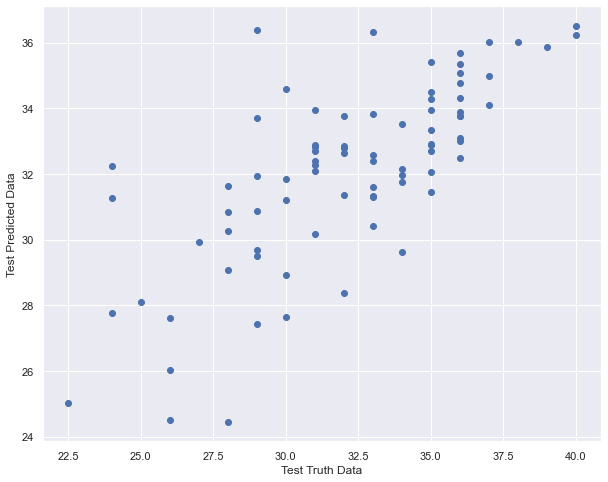

In [175]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [176]:
## residuals
ridge_residuals=y_test-ridge_pred

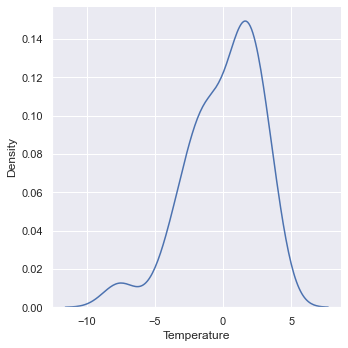

In [177]:
sn.displot(ridge_residuals,kind="kde")

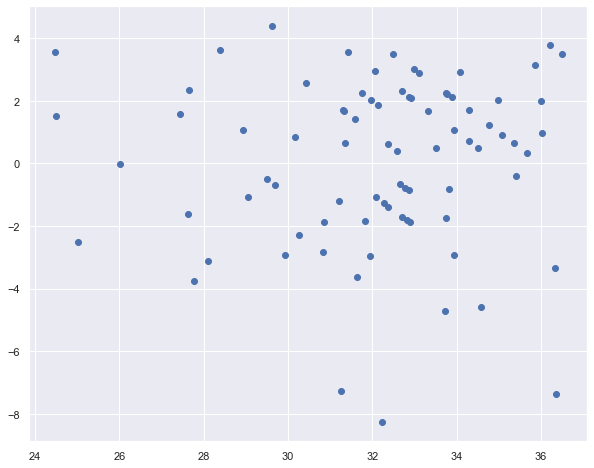

In [178]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(ridge_pred,ridge_residuals)

In [179]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

7.083588327138514
2.1766073188086144
2.6615011416752226


In [180]:
## R square and adjusted R square

In [181]:
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
print(score)

0.5277607781907657


In [182]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4524762645690038

## Lasso

In [184]:
## Lasso
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)

In [185]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [188]:
lasso_pred=lasso.predict(X_test)

Text(0, 0.5, 'Test Predicted Data')

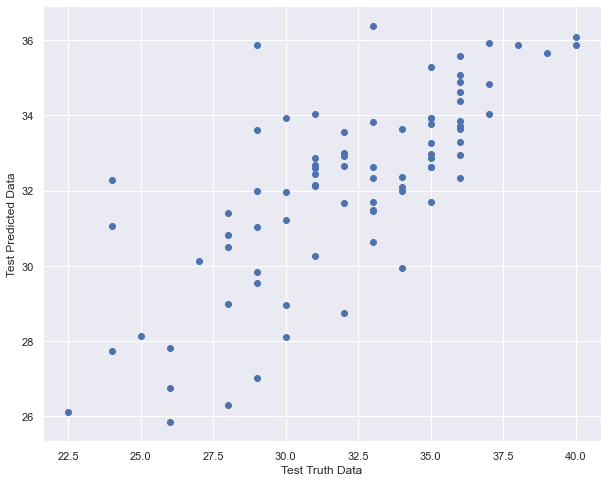

In [189]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [190]:
## residuals
lasso_residuals=y_test-lasso_pred

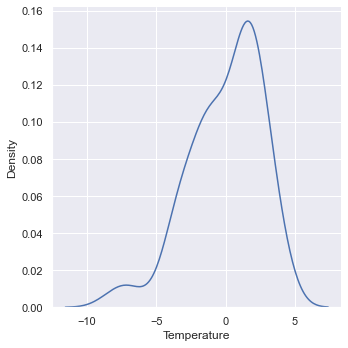

In [192]:
sn.displot(lasso_residuals,kind="kde")

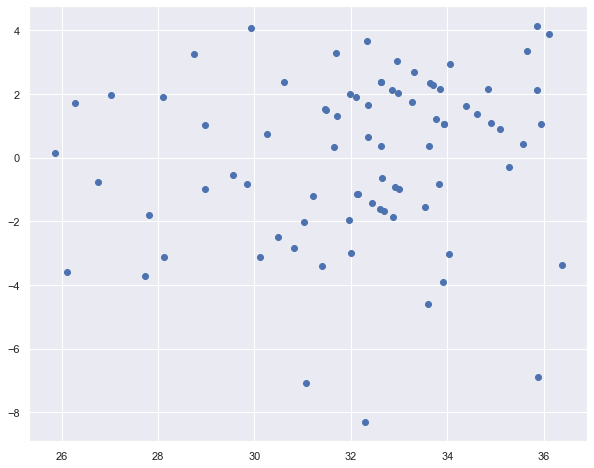

In [193]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(lasso_pred,lasso_residuals)

In [194]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

6.83805595195318
2.151216393946908
2.614967677037936


In [195]:
## R square and adjusted R square

In [212]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred)
print(score)

0.5441296032031213


In [213]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.471454612409416

#ElasticNet

In [200]:
## ElasticNet
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()

In [201]:
elasticnet.fit(X_train,y_train)

ElasticNet()

In [204]:
elasticnet_pred=elasticnet.predict(X_test)

Text(0, 0.5, 'Test Predicted Data')

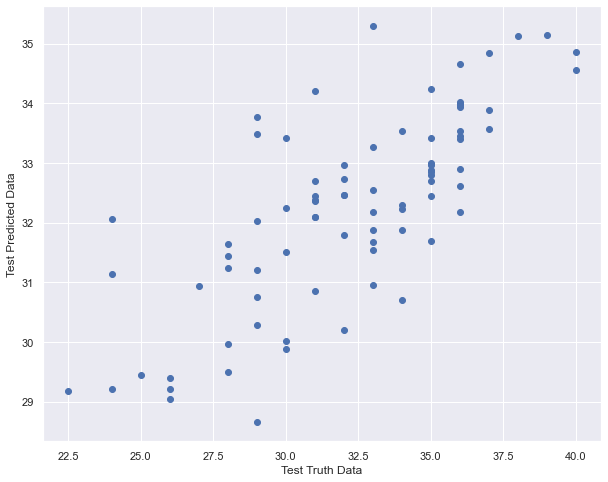

In [205]:
plt.scatter(y_test,elasticnet_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [206]:
## residuals
elasticnet_residuals=y_test-elasticnet_pred

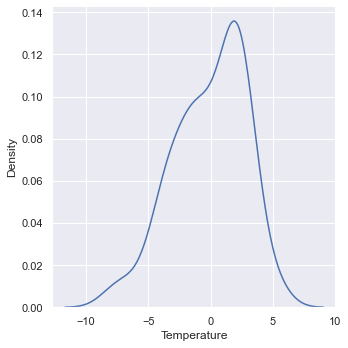

In [207]:
sn.displot(elasticnet_residuals,kind="kde")

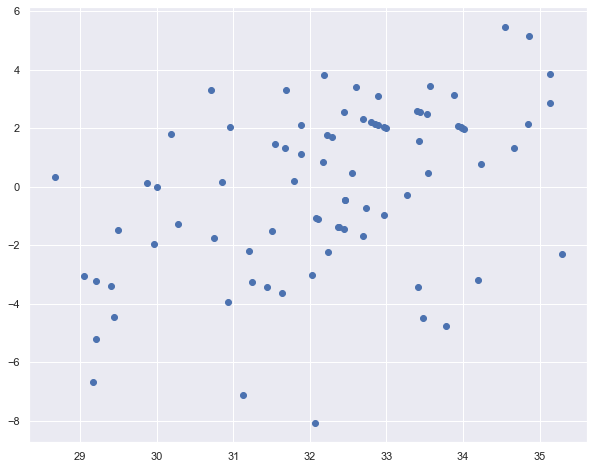

In [208]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(elasticnet_pred,elasticnet_residuals)

In [209]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elasticnet_pred))
print(mean_absolute_error(y_test,elasticnet_pred))
print(np.sqrt(mean_squared_error(y_test,elasticnet_pred)))

8.227602079987683
2.3901026207537104
2.8683796959237604


## R square and adjusted R square

In [210]:
from sklearn.metrics import r2_score
score=r2_score(y_test,elasticnet_pred)
print(score)

0.4514931946674877


In [211]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3640500807738988